# **Task 6: House Price Prediction**

In [1]:
#import libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

# load dataset in csv

In [2]:
#load dataset in csv
df = pd.read_csv("House Price Prediction.csv")

# EDA

In [3]:
# Show a dataset
df.head()

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1,1360,5,4,3,1970,Downtown,Excellent,No,149919
1,2,4272,5,4,3,1958,Downtown,Excellent,No,424998
2,3,3592,2,2,3,1938,Downtown,Good,No,266746
3,4,966,4,2,2,1902,Suburban,Fair,Yes,244020
4,5,4926,1,4,2,1975,Downtown,Fair,Yes,636056


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Id         2000 non-null   int64 
 1   Area       2000 non-null   int64 
 2   Bedrooms   2000 non-null   int64 
 3   Bathrooms  2000 non-null   int64 
 4   Floors     2000 non-null   int64 
 5   YearBuilt  2000 non-null   int64 
 6   Location   2000 non-null   object
 7   Condition  2000 non-null   object
 8   Garage     2000 non-null   object
 9   Price      2000 non-null   int64 
dtypes: int64(7), object(3)
memory usage: 156.4+ KB


In [5]:
df.describe()

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Price
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,1000.500000,2786.209500,3.003500,2.55250,1.993500,1961.446000,537676.855000
std,577.494589,1295.146799,1.424606,1.10899,0.809188,35.926695,276428.845719
min,1.000000,501.000000,1.000000,1.00000,1.000000,1900.000000,50005.000000
25%,500.750000,1653.000000,2.000000,2.00000,1.000000,1930.000000,300098.000000
50%,1000.500000,2833.000000,3.000000,3.00000,2.000000,1961.000000,539254.000000
75%,1500.250000,3887.500000,4.000000,4.00000,3.000000,1993.000000,780086.000000
max,2000.000000,4999.000000,5.000000,4.00000,3.000000,2023.000000,999656.000000


# Data Processing

In [6]:
#Check Missing Values
df.isnull().sum()

,0
Id,0
Area,0
Bedrooms,0
Bathrooms,0
Floors,0
YearBuilt,0
Location,0
Condition,0
Garage,0
Price,0


In [7]:
# missing values exist
df.fillna(df.median(numeric_only=True), inplace=True)

# Handle Categorical Feature

In [8]:
# Convert Yes / No to 0 / 1
df['Garage'] = df['Garage'].map({'Yes': 1, 'No': 0})

In [9]:
# Identify Categorical Columns
df.select_dtypes(include=['object']).columns

Index(['Location', 'Condition'], dtype='object')

In [10]:
# Convert Categorical Data to Numbers Location Column
df= pd.get_dummies(df, columns=['Location'], drop_first=True)

In [11]:
# Convert Categorical Data to Numbers Condition Column
df = pd.get_dummies(df, columns=['Condition'], drop_first=True)

In [12]:
#show dataset
df.head()

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Garage,Price,Location_Rural,Location_Suburban,Location_Urban,Condition_Fair,Condition_Good,Condition_Poor
0,1,1360,5,4,3,1970,0,149919,False,False,False,False,False,False
1,2,4272,5,4,3,1958,0,424998,False,False,False,False,False,False
2,3,3592,2,2,3,1938,0,266746,False,False,False,False,True,False
3,4,966,4,2,2,1902,1,244020,False,True,False,True,False,False
4,5,4926,1,4,2,1975,1,636056,False,False,False,True,False,False


# Feature Selection

In [13]:
X = df.drop('Price', axis=1)
y = df['Price']

# Train-Test Split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Feature Scaling (Important for Linear Regression)

In [15]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train Regression Model

In [16]:
# Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

# Make Predictions

In [17]:
y_pred = model.predict(X_test)

# Model Evaluation

In [18]:
# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("MAE:", mae)

MAE: 242867.44926338625


In [19]:
# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)

RMSE: 279785.21069002635


# Gradient Boosting Model

In [20]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(random_state=42)
gbr.fit(X_train, y_train)

y_pred_gbr = gbr.predict(X_test)

print("GBR MAE:", mean_absolute_error(y_test, y_pred_gbr))
print("GBR RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_gbr)))

GBR MAE: 243654.3519397346
GBR RMSE: 284102.2127349789


# Visualization: Actual vs Predicted Prices

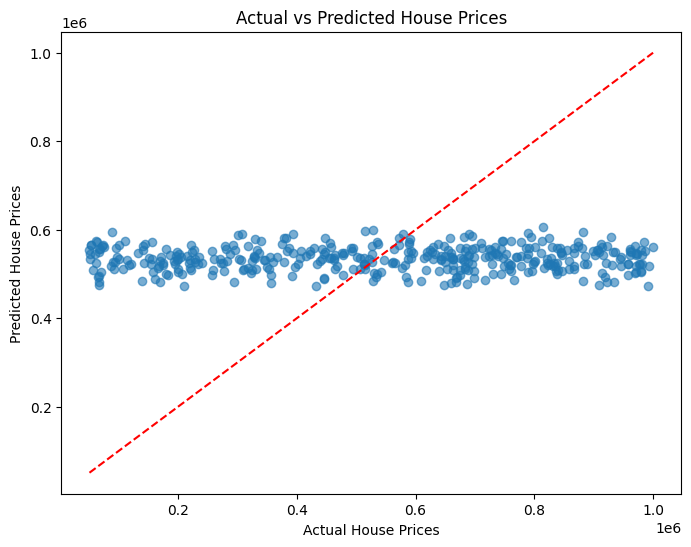

In [21]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel("Actual House Prices")
plt.ylabel("Predicted House Prices")
plt.title("Actual vs Predicted House Prices")
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color='red', linestyle='--')
plt.show()